In [118]:
import pandas as pd

In [119]:
data=pd.read_csv('train.csv')

In [120]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
sns.set()

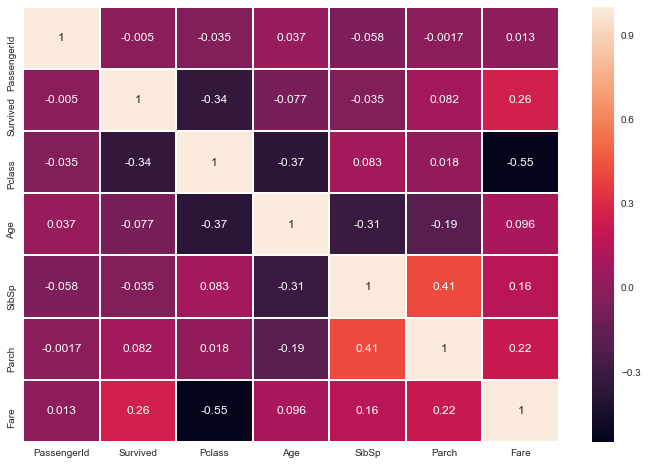

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linecolor='w',linewidths='1')

In [124]:
def checker(x):
    if x=='male':
        return 1
    else:
        return 0
        

In [125]:
data['Sex']=data['Sex'].apply(checker)

In [126]:
training_data=data[['PassengerId','Pclass','Fare','Sex']]

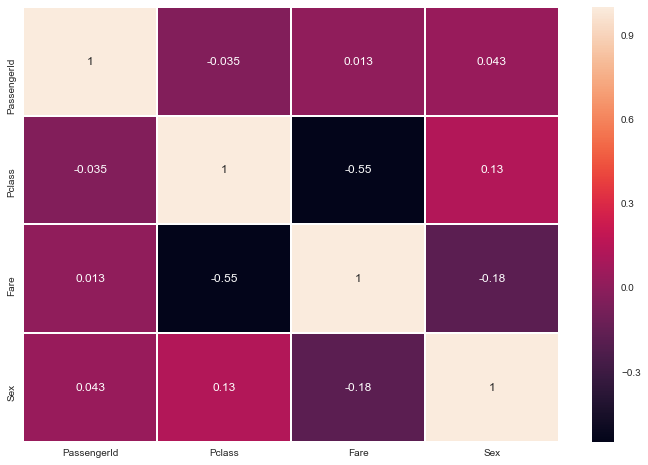

In [127]:
plt.figure(figsize=(12,8))
sns.heatmap(training_data.corr(),annot=True,linecolor='w',linewidths='1')

In [128]:
output_data=data['Survived']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X,x_test,Y,y_test=train_test_split(training_data,output_data,test_size=0.3,random_state=42)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model=LogisticRegression()

In [133]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
predictions=model.predict(x_test)

In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [136]:
confusion=confusion_matrix(predictions,y_test)

In [137]:
confusion

array([[133,  33],
       [ 24,  78]], dtype=int64)

In [138]:
score=accuracy_score(predictions,y_test)

In [139]:
score

0.7873134328358209

In [140]:
test_data=pd.read_csv('test.csv')

In [141]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
def checker(x):
    if x=='male':
        return 1
    else:
        return 0
        

In [143]:
test_data['Sex']=test_data['Sex'].apply(checker)

In [144]:
test_data=test_data[['PassengerId','Pclass','Fare','Sex']]

In [148]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [149]:
test_predictions=model.predict(test_data)

In [150]:
test_predictions_df = {  'PassengerId': test_data['PassengerId'],
                      'Survived':test_predictions
                     }

In [152]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [153]:
test_predictions_df = test_predictions_df.set_index('PassengerId')

In [154]:
test_predictions_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [155]:
test_predictions_df.to_csv('submit_new.csv')

In [156]:
##gender visualise

In [158]:
new_data=data.groupby[('Sex'),['Survived'].count()

SyntaxError: unexpected EOF while parsing (<ipython-input-158-c516ab58ed90>, line 1)

In [159]:
data.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [162]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
test_data.plot(kind='bar',stacked=True)
plt.xticks(rotation=30)